In [225]:
from birdy import WPSClient
import birdy 

fp_server = 'http://localhost:8093/wps'    # flyingpigeon
fp_i = WPSClient(fp_server, progress=True)
fp = WPSClient(fp_server)

finch_server = 'http://localhost:8092/wps'   # finch 
finch_i = WPSClient(url=finch_server, progress=True)
finch = WPSClient(finch_server)

In [226]:
from os import path, listdir

path = '/home/nils/nap_niger/data/NER/'
# lists all files stored in 'path'
pr_files = [ path+f for f in listdir(path) if 'pr_' in f]
pr_files.sort()

# for some indices you need tas as additional information
tas_files = [ path+f for f in listdir(path) if 'tas_' in f]
tas_files.sort()

In [227]:
# AFR-22_ECMWF-ERAINT_evaluation_r1i1p1_CLMcom-KIT-CCLM5-0-15_v1_day

pr = [f for f in pr_files if 'AFR-22_ECMWF-ERAINT_evaluation_r1i1p1_CLMcom-KIT-CCLM5-0-15_v1_day' in f]
tas = [f for f in tas_files if 'AFR-22_ECMWF-ERAINT_evaluation_r1i1p1_CLMcom-KIT-CCLM5-0-15_v1_day' in f]


In [110]:
# calculation of basic indices
prcptot = []
for i in range(len(pr)):
    prcptot.append(finch.prcptot(pr=pr[i], tas=tas[i], freq='YS').get()[0])

In [122]:
# wxplore the output:
prcptot

['http://127.0.0.1:8092/outputs/2f91fe3a-3f5d-11ea-a7e1-9cb6d08a53e7/out.nc',
 'http://127.0.0.1:8092/outputs/2fbaf5f6-3f5d-11ea-b1b6-9cb6d08a53e7/out.nc',
 'http://127.0.0.1:8092/outputs/2ff181ca-3f5d-11ea-a2d5-9cb6d08a53e7/out.nc',
 'http://127.0.0.1:8092/outputs/30289480-3f5d-11ea-9aa1-9cb6d08a53e7/out.nc',
 'http://127.0.0.1:8092/outputs/305dda14-3f5d-11ea-bd2c-9cb6d08a53e7/out.nc',
 'http://127.0.0.1:8092/outputs/3095c0dc-3f5d-11ea-a3c0-9cb6d08a53e7/out.nc',
 'http://127.0.0.1:8092/outputs/30ca6580-3f5d-11ea-b6d8-9cb6d08a53e7/out.nc',
 'http://127.0.0.1:8092/outputs/31015374-3f5d-11ea-9814-9cb6d08a53e7/out.nc',
 'http://127.0.0.1:8092/outputs/3135f4da-3f5d-11ea-88eb-9cb6d08a53e7/out.nc']

In [127]:
# download urls to local file sythem 

import urllib.request
prcptot_files = []
for i in range(len(prcptot)):
    out, _ = urllib.request.urlretrieve(prcptot[i], '../data/tmp/prcptot_AFR-22_ECMWF-ERAINT_evaluation_r1i1p1_CLMcom-KIT-CCLM5-0-15_v1_yr_{}_.nc'.format(i))
    prcptot_files.append(out)

In [128]:
prcptot_files

['../data/tmp/prcptot_AFR-22_ECMWF-ERAINT_evaluation_r1i1p1_CLMcom-KIT-CCLM5-0-15_v1_yr_0_.nc',
 '../data/tmp/prcptot_AFR-22_ECMWF-ERAINT_evaluation_r1i1p1_CLMcom-KIT-CCLM5-0-15_v1_yr_1_.nc',
 '../data/tmp/prcptot_AFR-22_ECMWF-ERAINT_evaluation_r1i1p1_CLMcom-KIT-CCLM5-0-15_v1_yr_2_.nc',
 '../data/tmp/prcptot_AFR-22_ECMWF-ERAINT_evaluation_r1i1p1_CLMcom-KIT-CCLM5-0-15_v1_yr_3_.nc',
 '../data/tmp/prcptot_AFR-22_ECMWF-ERAINT_evaluation_r1i1p1_CLMcom-KIT-CCLM5-0-15_v1_yr_4_.nc',
 '../data/tmp/prcptot_AFR-22_ECMWF-ERAINT_evaluation_r1i1p1_CLMcom-KIT-CCLM5-0-15_v1_yr_5_.nc',
 '../data/tmp/prcptot_AFR-22_ECMWF-ERAINT_evaluation_r1i1p1_CLMcom-KIT-CCLM5-0-15_v1_yr_6_.nc',
 '../data/tmp/prcptot_AFR-22_ECMWF-ERAINT_evaluation_r1i1p1_CLMcom-KIT-CCLM5-0-15_v1_yr_7_.nc',
 '../data/tmp/prcptot_AFR-22_ECMWF-ERAINT_evaluation_r1i1p1_CLMcom-KIT-CCLM5-0-15_v1_yr_8_.nc']

In [130]:
### manually merged the files to one file covering the whole timeseries: cdo mergetime * ../data/indices/prctot_AFR-22_ECMWF-ERAINT_evaluation_r1i1p1_CLMcom-KIT-CCLM5-0-15_v1_day_19790101-20161231.nc

In [231]:
# now its time to plot: 
from netCDF4 import Dataset #  , num2date
from eggshell.nc.nc_utils import get_variable, get_time
import numpy as np 

# example file 
prcptot_file = '../data/indices/prcptot_AFR-22_AFR-22_ECMWF-ERAINT_evaluation_r1i1p1_CLMcom-KIT-CCLM5-0-15_v1_yr_19790101-20161231.nc'

var = get_variable(prcptot_file)
timestepps = get_time(prcptot_file)
var

'prcptot'

In [232]:
#print 'variable name: %s' % var
ds = Dataset(prcptot_file)
prcptot = ds.variables[var] 
lats = ds.variables['lat']
lons = ds.variables['lon']

# trick to recover missing lat lon information (only possible, since AFR-22 Domain is actually not rotated)
lon = lons[0,:]
lat = lats[:,0]

prcptot_mean = np.mean(prcptot, axis=0) # mean   30 Years 1981-2010 and transform to Celsius
# var_sum.max()

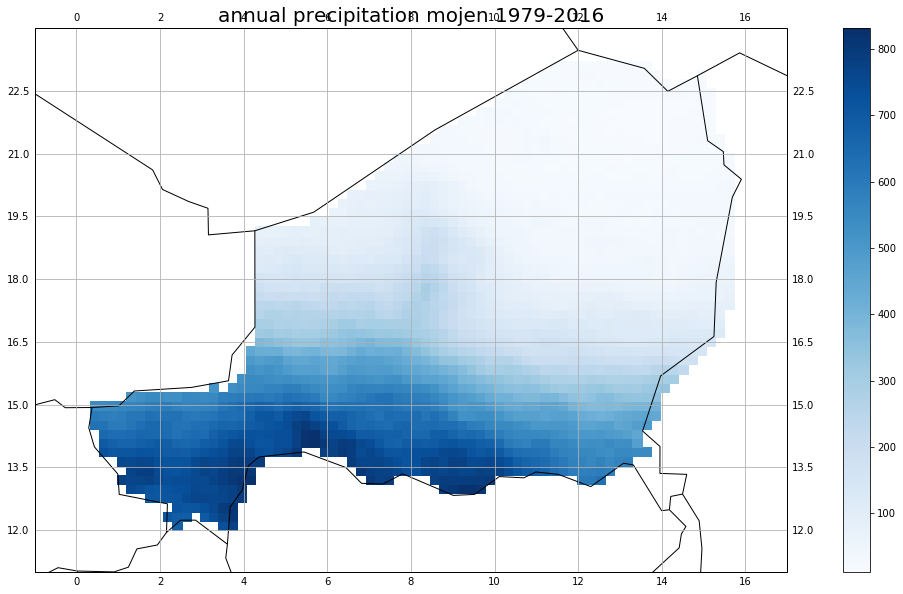

In [234]:
# prepare the plot with cartopy

from matplotlib import pyplot as plt
# from cartopy import config
# from cartopy.util import add_cyclic_point
import cartopy.crs as ccrs
from numpy import meshgrid
import cartopy.feature as cfeature

# to show the plots inline
%matplotlib inline


lons, lats = meshgrid(lon, lat)

fig = plt.figure(figsize=(20, 10), facecolor='w', edgecolor='k')
ax = plt.axes(projection=ccrs.PlateCarree())

extent=(-1,17,11.0,24)
ax.set_extent(extent)

ax.add_feature(cfeature.BORDERS)
# ax.add_feature(cfeature.RIVERS)
# ax.stock_img()
ax.gridlines(draw_labels=True)

# ax.xaxis.set_ticks_position('bottom')
# ax.yaxis.set_ticks_position('left')
# ax.colorbar

plt.title('annual precipitation mojen 1979-2016', fontsize=20)

cs = plt.pcolormesh(lons, lats, prcptot_mean, transform=ccrs.PlateCarree(), cmap='Blues')
plt.colorbar(cs)

plt.savefig(fname='./pics/prcptot_mean_1979-2016.png')

In [143]:
d2 = np.nanmean(prcptot, axis=1)
ts = np.nanmean(d2, axis=1)

masked_array(data=[415.739  , 306.92303, 335.67676, 355.92523, 209.69022,
                   286.7118 , 353.3748 , 384.9126 , 341.82016, 366.44266,
                   448.49603, 300.4597 , 340.1116 , 307.96332, 358.20923,
                   355.00247, 381.49805, 310.95178, 298.47083, 411.1555 ,
                   445.8355 , 335.81012, 294.53226, 393.35022, 358.44458,
                   385.30643, 396.04037, 317.70844, 272.39215, 380.02524,
                   360.46692, 377.73563, 294.03992, 446.24777, 316.50516,
                   296.0857 , 344.42813, 275.4087 ],
             mask=False,
       fill_value=1e+20,
            dtype=float32)

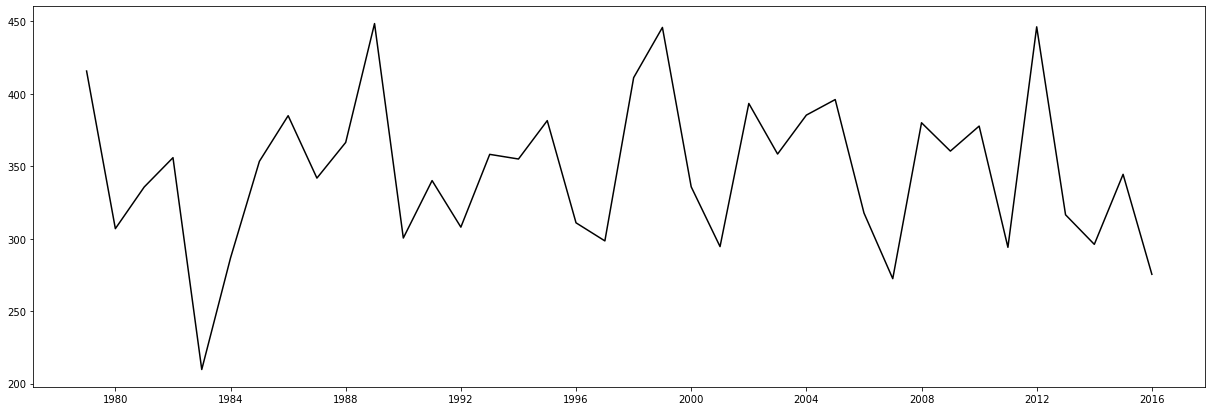

In [147]:
fig = plt.figure(figsize=(21, 7), facecolor='w', edgecolor='k')
plt.plot(timestepps,ts, 'black')
plt.show() 

In [207]:
# repeating the same indice calculation for all available datasets


In [150]:
path = '/home/nils/nap_niger/data/NER/'
# lists all files stored in 'path'
pr_files = [ path+f for f in listdir(path) if 'pr_' in f]
pr_files.sort()

# for some indices you need tas as additional information
tas_files = [ path+f for f in listdir(path) if 'tas_' in f]
tas_files.sort()

In [154]:
# from eggshell.nc.nc_utils import sort_by_filename
# ds_pr = sort_by_filename(pr_files)
# ds_tas = sort_by_filename(tas_files)

In [195]:
from os.path import basename 

ds = {} # dic of correspinding pairs

for i in range(len(pr_files)):
    ds_name = basename(pr_files[i]).replace('pr_', '')
    if any(path + 'tas_' + ds_name):
        try:
            tas_i = tas_files.index(path + 'tas_' + ds_name)
#             print(tas_i)
            ds[ds_name] = [pr_files[i], tas_files[tas_i]]
        except:
            print('failed to find corrseponding tas for {}'.format(ds_name))
    else: 
        print('no corresponding tas for {}'.format(ds_name))

failed to find corrseponding tas for AFR-22_MOHC-HadGEM2-ES_rcp85_r1i1p1_GERICS-REMO2015_v1_day_20060101-20101230_NER.nc
failed to find corrseponding tas for AFR-22_MOHC-HadGEM2-ES_rcp85_r1i1p1_GERICS-REMO2015_v1_day_20110101-20151230_NER.nc
failed to find corrseponding tas for AFR-22_MOHC-HadGEM2-ES_rcp85_r1i1p1_GERICS-REMO2015_v1_day_20160101-20201230_NER.nc
failed to find corrseponding tas for AFR-22_MOHC-HadGEM2-ES_rcp85_r1i1p1_GERICS-REMO2015_v1_day_20210101-20251230_NER.nc
failed to find corrseponding tas for AFR-22_MOHC-HadGEM2-ES_rcp85_r1i1p1_GERICS-REMO2015_v1_day_20260101-20301230_NER.nc
failed to find corrseponding tas for AFR-22_MOHC-HadGEM2-ES_rcp85_r1i1p1_GERICS-REMO2015_v1_day_20310101-20351230_NER.nc
failed to find corrseponding tas for AFR-22_MOHC-HadGEM2-ES_rcp85_r1i1p1_GERICS-REMO2015_v1_day_20360101-20401230_NER.nc
failed to find corrseponding tas for AFR-22_MOHC-HadGEM2-ES_rcp85_r1i1p1_GERICS-REMO2015_v1_day_20410101-20451230_NER.nc
failed to find corrseponding tas

In [203]:
# calculate prcptot for all available datasets

prcptot = []
for i in ds.keys():
    pair = ds[i]
    url = finch.prcptot(pr=pair[0], tas=pair[1], freq='YS').get()[0]
    filename = i.replace('_day_', '_yr_')
    out, _ = urllib.request.urlretrieve(url, '../data/tmp/'+filename)
    prcptot_files.append(out)

In [206]:
prcptot_files

['../data/tmp/prcptot_AFR-22_ECMWF-ERAINT_evaluation_r1i1p1_CLMcom-KIT-CCLM5-0-15_v1_yr_0_.nc',
 '../data/tmp/prcptot_AFR-22_ECMWF-ERAINT_evaluation_r1i1p1_CLMcom-KIT-CCLM5-0-15_v1_yr_1_.nc',
 '../data/tmp/prcptot_AFR-22_ECMWF-ERAINT_evaluation_r1i1p1_CLMcom-KIT-CCLM5-0-15_v1_yr_2_.nc',
 '../data/tmp/prcptot_AFR-22_ECMWF-ERAINT_evaluation_r1i1p1_CLMcom-KIT-CCLM5-0-15_v1_yr_3_.nc',
 '../data/tmp/prcptot_AFR-22_ECMWF-ERAINT_evaluation_r1i1p1_CLMcom-KIT-CCLM5-0-15_v1_yr_4_.nc',
 '../data/tmp/prcptot_AFR-22_ECMWF-ERAINT_evaluation_r1i1p1_CLMcom-KIT-CCLM5-0-15_v1_yr_5_.nc',
 '../data/tmp/prcptot_AFR-22_ECMWF-ERAINT_evaluation_r1i1p1_CLMcom-KIT-CCLM5-0-15_v1_yr_6_.nc',
 '../data/tmp/prcptot_AFR-22_ECMWF-ERAINT_evaluation_r1i1p1_CLMcom-KIT-CCLM5-0-15_v1_yr_7_.nc',
 '../data/tmp/prcptot_AFR-22_ECMWF-ERAINT_evaluation_r1i1p1_CLMcom-KIT-CCLM5-0-15_v1_yr_8_.nc',
 '../data/tmp/AFR-22_ECMWF-ERAINT_evaluation_r1i1p1_CLMcom-KIT-CCLM5-0-15_v1_yr_19790101-19801231_NER.nc',
 '../data/tmp/AFR-22_ECMWF-ER

In [218]:
path = '/home/nils/nap_niger/data/indices/'
# lists all files stored in 'path'
prcptot_files = [ path+f for f in listdir(path)] #  if 'prcptot_' in f
prcptot.sort()
prcptot_files

['/home/nils/nap_niger/data/indices/prcptot_AFR-22_ECMWF-ERAINT_evaluation_r1i1p1_GERICS-REMO2015_v1_yr_19790102-20171231_NER.nc',
 '/home/nils/nap_niger/data/indices/prcptot_AFR-22_MPI-M-MPI-ESM-LR_rcp26_r1i1p1_CLMcom-KIT-CCLM5-0-15_v1_yr_20060101-21001231_NER.nc',
 '/home/nils/nap_niger/data/indices/prcptot_AFR-22_ECMWF-ERAINT_evaluation_r1i1p1_CLMcom-KIT-CCLM5-0-15_v1_yr_19790101-20161231_NER.nc',
 '/home/nils/nap_niger/data/indices/prcptot_AFR-22_MOHC-HadGEM2-ES_rcp26_r1i1p1_CLMcom-KIT-CCLM5-0-15_v1_yr_20060101-20981230_NER.nc',
 '/home/nils/nap_niger/data/indices/prcptot_AFR-22_MOHC-HadGEM2-ES_rcp26_r1i1p1_GERICS-REMO2015_v1_yr_20060101-20991230_NER.nc',
 '/home/nils/nap_niger/data/indices/prcptot_AFR-22_MPI-M-MPI-ESM-LR_historical_r1i1p1_CLMcom-KIT-CCLM5-0-15_v1_yr_19500101-20051231_NER.nc',
 '/home/nils/nap_niger/data/indices/prcptot_AFR-22_MOHC-HadGEM2-ES_historical_r1i1p1_CLMcom-KIT-CCLM5-0-15_v1_yr_19500101-20051230_NER.nc',
 '/home/nils/nap_niger/data/indices/prcptot_AFR-22_

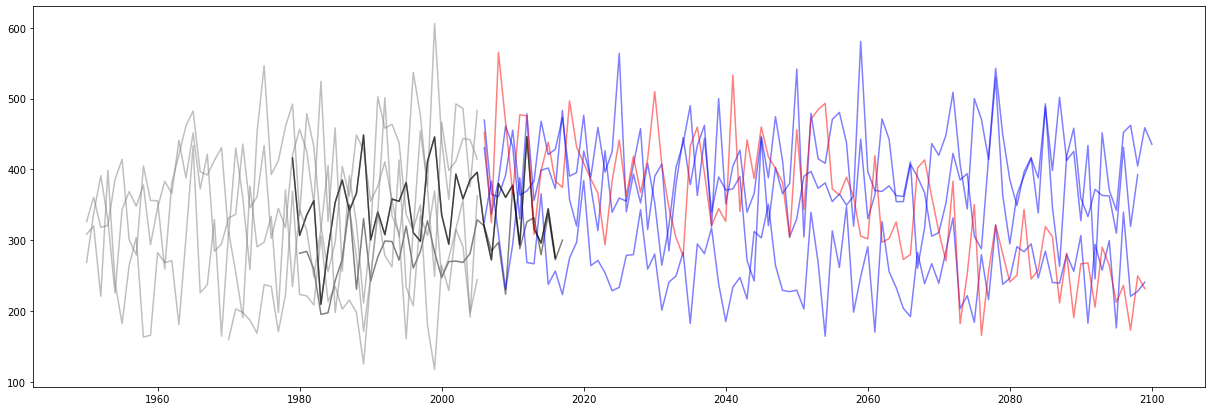

In [236]:
fig = plt.figure(figsize=(21, 7), facecolor='w', edgecolor='k')
   
for i in prcptot_files:
    ds = Dataset(i)
    prcptot = ds.variables[var] 
    yrs = get_time(i)
    if 'historical' in i:
        col = 'grey'
    elif 'evaluation' in i:
        col = 'black'
    elif 'rcp26' in i:
        col = 'blue'
    elif 'rcp85' in i:
        col = 'red'
    else:
        col = 'green'
    
    d2 = np.nanmean(prcptot, axis=1)
    ts = np.nanmean(d2, axis=1)
    plt.plot(yrs,ts, col, alpha=0.5)

# plt.savefig(fname='./pics/prcptot_timeserie.png')    
plt.show() 
    

In [ ]:
np.